In [321]:
# 1D example (values)
import math
import random
 
#Defining our function 
def kmeans(arr, k, iterations):
    
    # Start with replace=false, to avoid same selection
    start = np.random.choice(len(arr), k, replace=False)
    
    centroid = []
    
    for i in start:
        centroid.append(arr[i])
        
    centroid.sort()
    
    clusters = [[] for i in range(k)]
    
    for i in range(len(arr)):
        min = math.inf
        index = -1
        for j in range(k):
            if (min > (abs(centroid[j] - arr[i]))):
                min = (abs(centroid[j] - arr[i]))
                index = j
        clusters[index].append(arr[i])
    
    # Initial pass done, need to refine
    for n in range(iterations):
        
        # Update centroid with mean value of clusters
        centroid = []
        
        for i in range(k):
            mean = 0;
            for j in range(len(clusters[i])):
                mean += clusters[i][j]
            if(len(clusters[i]) != 0):
                mean /= len(clusters[i])
            centroid.append(mean)
        
        centroid.sort()
        #Repeating for new centroids
        clusters = [[] for i in range(k)]
        
        for i in range(len(arr)):
            min = math.inf
            index = -1
            for j in range(k):
                if (min > (abs(centroid[j] - arr[i]))):
                    min = (abs(centroid[j] - arr[i]))
                    index = j
            clusters[index].append(arr[i])
            clusters[index].sort()
            
    print("Centroids:", centroid, "\nClusters:", clusters)
    
testarr = [random.randint(1,100) for _ in range(100)]
kmeans(testarr, 5, 200)

Centroids: [8.8, 23.80952380952381, 42.476190476190474, 62.76190476190476, 86.0] 
Clusters: [[1, 3, 3, 5, 5, 5, 7, 9, 12, 13, 13, 13, 14, 14, 15], [17, 17, 18, 20, 21, 21, 22, 22, 22, 22, 23, 23, 24, 24, 25, 26, 29, 30, 30, 32, 32], [35, 36, 37, 37, 38, 38, 40, 40, 41, 41, 42, 43, 44, 45, 45, 47, 47, 48, 48, 49, 51], [53, 54, 56, 57, 57, 59, 59, 61, 62, 62, 62, 63, 63, 64, 65, 66, 67, 71, 71, 73, 73], [75, 76, 76, 77, 77, 81, 82, 82, 82, 83, 84, 85, 88, 90, 90, 91, 92, 92, 93, 97, 99, 100]]


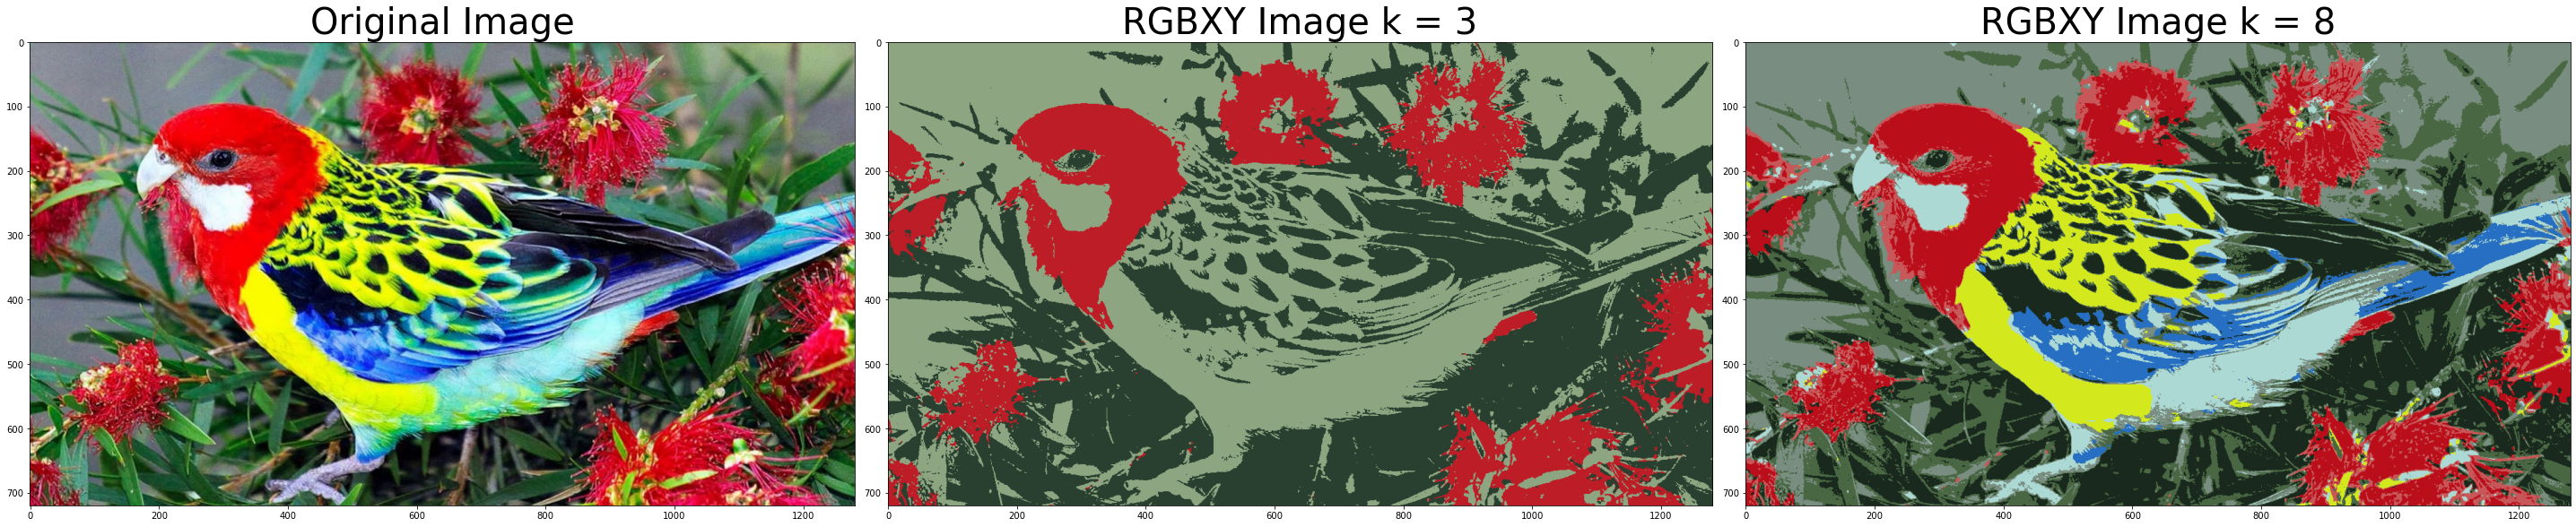

In [31]:
# 5D example (r, g, b, x, y)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Default
img = cv2.imread("testbird.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Prepare image for kmeans, now in arrays of rgb
values = img.reshape((-1, 3))
values = np.float32(values)

#K-means
k = 3
stop = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, .2)
_, labels, (centers) = cv2.kmeans(values, k, None, stop, 10, cv2.KMEANS_RANDOM_CENTERS)
centers= np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

k = 8
_, labels, (centers) = cv2.kmeans(values, k, None, stop, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image2 = centers[labels.flatten()]
segmented_image2 = segmented_image2.reshape(img.shape)


fig = plt.figure(figsize=(40,45))
plt.subplot(131)
plt.title("Original Image", fontsize=40)
plt.imshow(img)
plt.subplot(132)
plt.title("RGBXY Image k = 3", fontsize=40)
plt.imshow(segmented_image)
plt.subplot(133)
plt.title("RGBXY Image k = 8", fontsize=40)
plt.imshow(segmented_image2)

plt.tight_layout()